In [38]:
# Library imports
import tensorflow as tf
import numpy as np
keras = tf.keras
import matplotlib.pyplot as plt

# Local imports
import utils

In [7]:
x = tf.zeros([10,10], name='x')
x

<tf.Tensor: id=16, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [8]:
x += 2
x

<tf.Tensor: id=19, shape=(10, 10), dtype=float32, numpy=
array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]], dtype=float32)>

In [10]:
v = tf.Variable(1.0, name='v')
v

<tf.Variable 'v:0' shape=() dtype=float32, numpy=1.0>

In [11]:
v.assign(3.0)
v

<tf.Variable 'v:0' shape=() dtype=float32, numpy=3.0>

In [12]:
v2 = tf.Variable(tf.square(v), name='v2')
v2

<tf.Variable 'v2:0' shape=() dtype=float32, numpy=9.0>

In [16]:
class LinearModel:
    def __init__(self):
        self.W = tf.Variable(0.0)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.W * x + self.b

In [17]:
model = LinearModel()
model(3.0).numpy()

0.0

In [18]:
def loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [25]:
W_true = 3.0
b_true = 2.0
num_examples = 2000

x = tf.random.normal(shape=[num_examples])
noise = tf.random.normal(shape=[num_examples])
y = W_true * x + b_true + noise

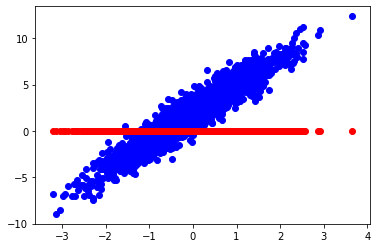

In [26]:
plt.scatter(x, y, color='b')
plt.scatter(x, model(y), color='r')
plt.show()

In [27]:
print(f'Current Loss: {loss(model(x), y):6.3f}')

Current Loss: 12.928


In [31]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(model(x), y)
    dW, db = tape.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [32]:
model = LinearModel()

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    # current_loss = loss(model(x), y)
    current_loss = train(model, x, y, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=0.00 b=0.00, loss=12.92796
Epoch  1: W=0.56 b=0.36, loss=8.89347
Epoch  2: W=1.02 b=0.65, loss=6.22396
Epoch  3: W=1.39 b=0.89, loss=4.45753
Epoch  4: W=1.69 b=1.08, loss=3.28863
Epoch  5: W=1.94 b=1.24, loss=2.51511
Epoch  6: W=2.14 b=1.37, loss=2.00321
Epoch  7: W=2.30 b=1.48, loss=1.66444
Epoch  8: W=2.43 b=1.57, loss=1.44023
Epoch  9: W=2.54 b=1.64, loss=1.29183


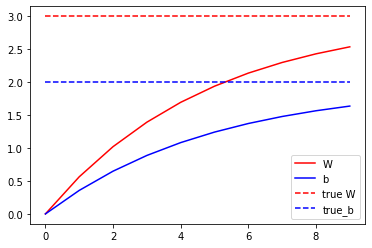

In [34]:
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([W_true] * len(epochs), 'r--',
         [b_true] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()

In [35]:
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    # current_loss = loss(model(x), y)
    current_loss = train(model, x, y, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=2.62 b=1.69, loss=1.19362
Epoch  1: W=2.69 b=1.74, loss=1.12861
Epoch  2: W=2.75 b=1.78, loss=1.08559
Epoch  3: W=2.80 b=1.81, loss=1.05711
Epoch  4: W=2.83 b=1.84, loss=1.03825
Epoch  5: W=2.86 b=1.86, loss=1.02577
Epoch  6: W=2.89 b=1.88, loss=1.01751
Epoch  7: W=2.91 b=1.89, loss=1.01205
Epoch  8: W=2.93 b=1.90, loss=1.00843
Epoch  9: W=2.94 b=1.91, loss=1.00603


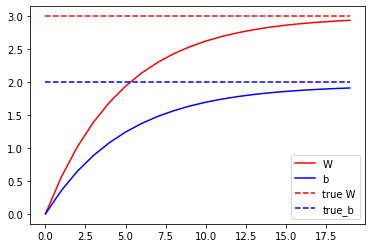

In [37]:
epochs = range(20)
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([W_true] * len(epochs), 'r--',
         [b_true] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()